In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

In [7]:
def heun_ode(f, y0, xs, n_corrections = 1):
    """
    param f:
        좌변 상미분 방정식 y' = f(y, x)
    param y0:
        초기 값 y0 = y(x0)
    param xs:
        y 값을 추정하기 위한 x 값의 리스트
    param n_corrections:
        Corrector step의 반복 횟수
    """
    
    ys = [y0] * len(xs) # ys 리스트 만들어 주기
    for i, (x_curr, x_next) in enumerate(zip(xs[:-1], xs[1:])):
        y_curr = ys[i]
        h = x_next - x_curr

        # predictor fomula as it is
        dydx = f(x_curr, y_curr)
        y_next = y_curr + h * dydx
        
        # corrector fomula as it is
        for j in range(n_corrections):
            y_next = y_curr + 0.5 * h * (dydx + f(x_next, y_next)) 
            #y_next 값이 계속 들어가면서, 원하는 횟수 까지 계속해서 correct가 일어남.
            
        ys[i + 1] = y_next # 모든 y에 대하여 predictor과 corrector이 다 이루어져야 하니, 전체를 다하게끔.
        
    return ys
        

$y' = y$ 를 계산해보자. x는 $[0,2]$, 초기값 y(0) = 1

0
1


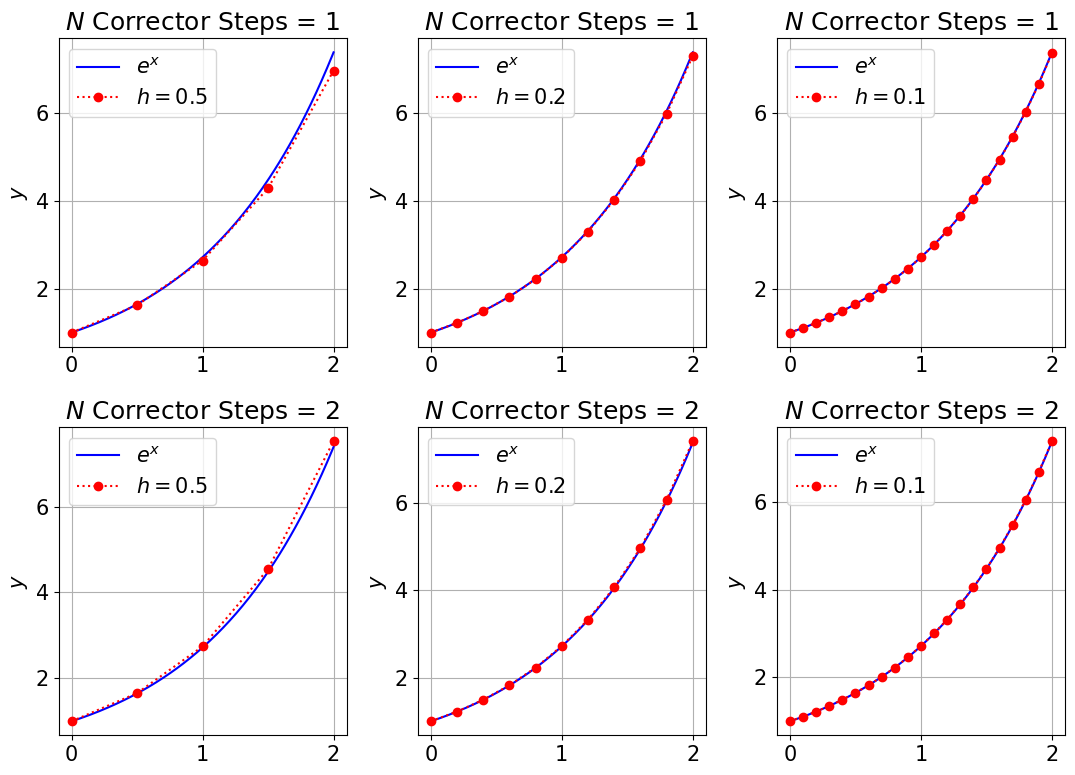

In [62]:
def f(x, y):
    return y

x_true = np.linspace(0, 2, 200)
y_true = np.exp(x_true)

plt.figure(figsize = [11, 8])

rows = [1, 2]
columns = [5, 11, 21]
for i, n_corrections in enumerate(rows):
    for j, n_divs in enumerate(columns):
        
        x = np.linspace(0, 2, n_divs) # n_divs = 5, 11, 21, 5, 11, 21 이렇게 반복됨.
        y = heun_ode(f, 1, x, n_corrections = n_corrections) # 1, 1, 1, 2, 2, 2 이렇게 반복됨.
        
        #같은 그래프를, 굳이 여러번 반복시킬 필요가 없다.
        #subplot으로 그림을 그릴 것인데, *map과 변하는 값 i, j를 이용하여 그림을 그려볼 수 있다.
        
        plt.subplot(*map(len, [rows, columns]), i*len(columns) + j + 1) 
        #print(*map(len, [rows, columns]), i * len(columns) + j + 1)
        #2, 3, 1 / 2, 3, 2 / 2, 3, 3 / 2, 3, 4 / 2, 3, 5 / 2, 3, 6 /
        #이렇게 나온다. 이는 직접 하나씩 넣어보면서 이해해보자. i, j 에 뭐가 들어가는지.
        
        
        
        plt.plot(x_true, y_true, "-b", x, y, "o:r")
        plt.legend(["$e^x$", f"$h = {x[1] - x[0]}$"])
        plt.title(f"$N$ Corrector Steps = {n_corrections}")
        plt.ylabel("$y$")
        plt.grid()
        
plt.tight_layout()
plt.show()

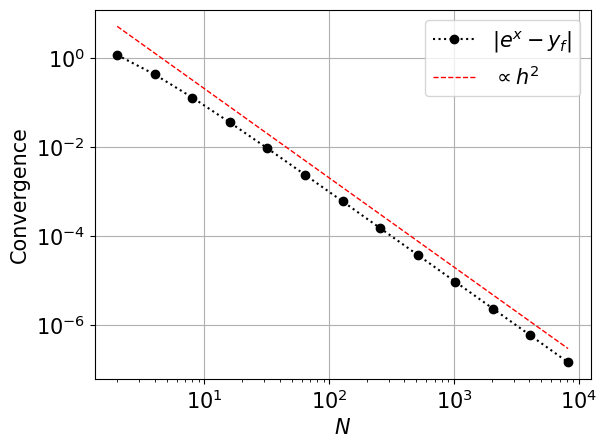

In [18]:
def f(x, y):
    return y

N = [2**i for i in range(1, 14)]
error = [
    abs(np.exp(2) - heun_ode(f, 1, np.linspace(0, 2, n + 1))[-1])
    for n in N
]

plt.figure()

plt.loglog(N, error, 'o:k', label = "$|e^x - y_f|$")
plt.loglog(N, [20 / n**2 for n in N], '--r', lw = 1, label = "$\\propto h^2$")
plt.grid()
plt.xlabel("$N$")
plt.ylabel("Convergence")
plt.legend()

plt.show()

In [19]:
for i, n_corrections in enumerate(rows):
    for j, n_divs in enumerate(columns):      
        print(n_corrections)

1
1
1
2
2
2


In [21]:
*map(len, [rows, columns]), i * len(columns) + j + 1 

(2, 3, 6)

In [27]:
a = [1, 2, 3]
b = [4, 5, 6]
map(len, [a, b])

In [47]:
def my_var_func(*args):
    print('The number of args is', len(args))
    for item in args:
        print(item)
my_var_func(1, 2, 3 ,4 ,5, 3)

The number of args is 6
1
2
3
4
5
3


In [54]:
map(len, [rows,columns])